#Importing libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For arrays and vectors
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For creating wordcloud
from wordcloud import WordCloud

# For string manipulation
import string

# For creating vectors from text and determining similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# To display DataFrame
from IPython.display import display

# Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [26]:
# Download data files from Google Drive
!pip install gdown
!gdown --id 11lg5kzdTidiiYjqlfLXQn0r8yi5ae77O
!gdown --id 1DXMxVci-rdvXGgtf8fRXr6wWS-FFxUA4
!gdown --id 1M9oq8IN-Icr5S1-aPenEqcJux41ubERa

C:\Users\tanus\anaconda3\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=11lg5kzdTidiiYjqlfLXQn0r8yi5ae77O
From (redirected): https://drive.google.com/uc?id=11lg5kzdTidiiYjqlfLXQn0r8yi5ae77O&confirm=t&uuid=707048ea-2c75-44fb-8d30-3c67e439e732
To: C:\Users\tanus\Downloads\tracks_transformed.csv

  0%|          | 0.00/134M [00:00<?, ?B/s]
  0%|          | 524k/134M [00:01<04:23, 505kB/s]
  1%|          | 1.05M/134M [00:02<04:16, 517kB/s]
  1%|1         | 1.57M/134M [00:03<04:19, 510kB/s]
  2%|1         | 2.10M/134M [00:04<04:20, 505kB/s]
  2%|1         | 2.62M/134M [00:05<04:30, 484kB/s]
  2%|2         | 3.15M/134M [00:06<04:22, 497kB/s]
  3%|2         | 3.67M/134M [00:07<04:17, 505kB/s]
  3%|3         | 4.19M/134M [00:08<04:11, 516kB/s]
  4%|3         | 4.72M/134M [00:09<04:12, 510

C:\Users\tanus\anaconda3\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DXMxVci-rdvXGgtf8fRXr6wWS-FFxUA4
To: C:\Users\tanus\Downloads\artists_transformed.csv

  0%|          | 0.00/58.5M [00:00<?, ?B/s]
  1%|          | 524k/58.5M [00:01<01:55, 500kB/s]
  2%|1         | 1.05M/58.5M [00:02<01:51, 517kB/s]
  3%|2         | 1.57M/58.5M [00:02<01:47, 531kB/s]
  4%|3         | 2.10M/58.5M [00:03<01:46, 528kB/s]
  4%|4         | 2.62M/58.5M [00:05<01:51, 502kB/s]
  5%|5         | 3.15M/58.5M [00:06<01:48, 511kB/s]
  6%|6         | 3.67M/58.5M [00:07<01:45, 522kB/s]
  7%|7         | 4.19M/58.5M [00:08<01:43, 522kB/s]
  8%|8         | 4.72M/58.5M [00:09<01:42, 523kB/s]
  9%|8         | 5.24M/58.5M [00:10<01:47, 495kB/s]
 10%|9         | 5.77M/58.5M [00:11<01:45, 499kB/s]
 11%|#         | 6.29M/58.

In [6]:
# Reading data file and displaying first 5 records
tracks = pd.read_csv(r'C:\Users\tanus\Documents\github\Song_recommendation_system\tracks_transformed.csv', na_filter=False)
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [33]:
tracks.columns

Index(['id', 'name', 'artists', 'id_artists', 'genres', 'release_year',
       'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [34]:
tracks.shape

(586672, 19)

In [4]:
# Reading artists data file
artists = pd.read_csv(r'C:\Users\tanus\Documents\github\Song_recommendation_system\artists_transformed.csv')

# Drop rows with null values
artists.dropna(inplace=True)

# Convert "followers" field to numeric
artists['followers'] = pd.to_numeric(artists['followers'])

# Displaying first 5 records
artists.head()

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp harp,Vera Dulova,3


In [36]:
artists.columns

Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')

In [37]:
artists.shape

(298610, 5)

In [5]:
# Reading genres data file and displaying first 5 records
genres = pd.read_csv(r'C:\Users\tanus\Documents\github\Song_recommendation_system\data_by_genres_o.csv', na_filter=False)
genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [39]:
genres.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

In [40]:
genres.shape

(2973, 14)

#Exploratory Data Analysis

Tracks data

In [41]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,586672.0,1988.566168,22.831283,1900.000,1974.0000,1992.000000,2007.00000,2021.000
duration_s,586672.0,230.051167,126.526087,3.344,175.0930,214.893000,263.86700,5621.218
popularity,586672.0,27.570053,18.370642,0.000,13.0000,27.000000,41.00000,100.000
danceability,586672.0,0.563594,0.166103,0.000,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.000,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.000,2.0000,5.000000,8.00000,11.000
loudness,586672.0,49.793933,5.089328,0.000,47.1090,50.757000,53.51800,65.376
mode,586672.0,0.658797,0.474114,0.000,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.000,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.000,0.0969,0.422000,0.78500,0.996


1. The tracks data contains songs that were released as early as in 1900, up untill 2021.
2. The longest song/track is about 5621 seconds (93 minutes) long, and the shortest song/track is only 3 seconds long.
3. On average, the songs are fairly danceable (mean value = 0.563) and energetic (mean value = 0.542).
4. The mean tempo for songs/tracks on Spotify is about 118 beats per minute (BPM), while the fastest song has a tempo of 246.381 BPM.

Artists data

In [42]:
# Displaying summary statistics for artists data
artists.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,298610.0,38506.674743,500715.449177,0.0,157.0,894.0,5221.75,78900234.0
popularity,298610.0,19.535937,17.527959,0.0,4.0,16.0,32.00,100.0


Some observations:

1. The most followed artist on Spotify has 78.90 million followers.
2. On average, an artist on Spotify has about 38,506 followers.

Most popular songs/tracks

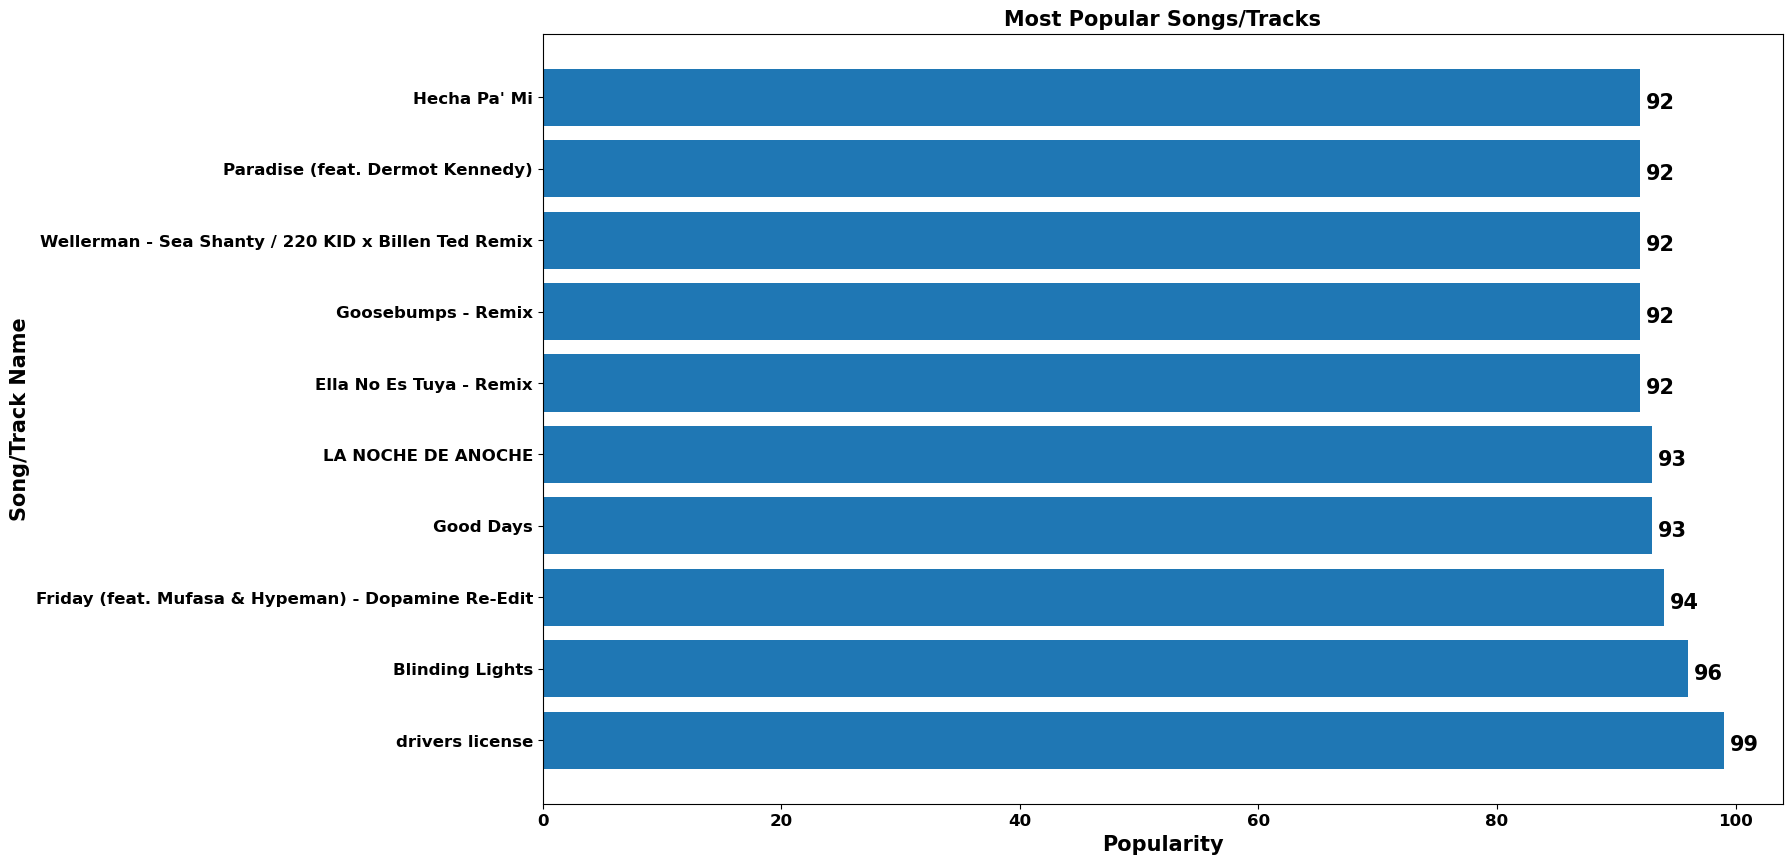

In [43]:
# Getting top 10 most popular tracks
popular_songs = tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

1. The most popular song on Spotify (in terms of popularity rating) is Olivia Rodrigo's drivers license, with a popularity rating of 99.

2. The 2nd most popular song is Blinding Lights by The Weeknd, followed by Friday in 3rd.

Most popular artists

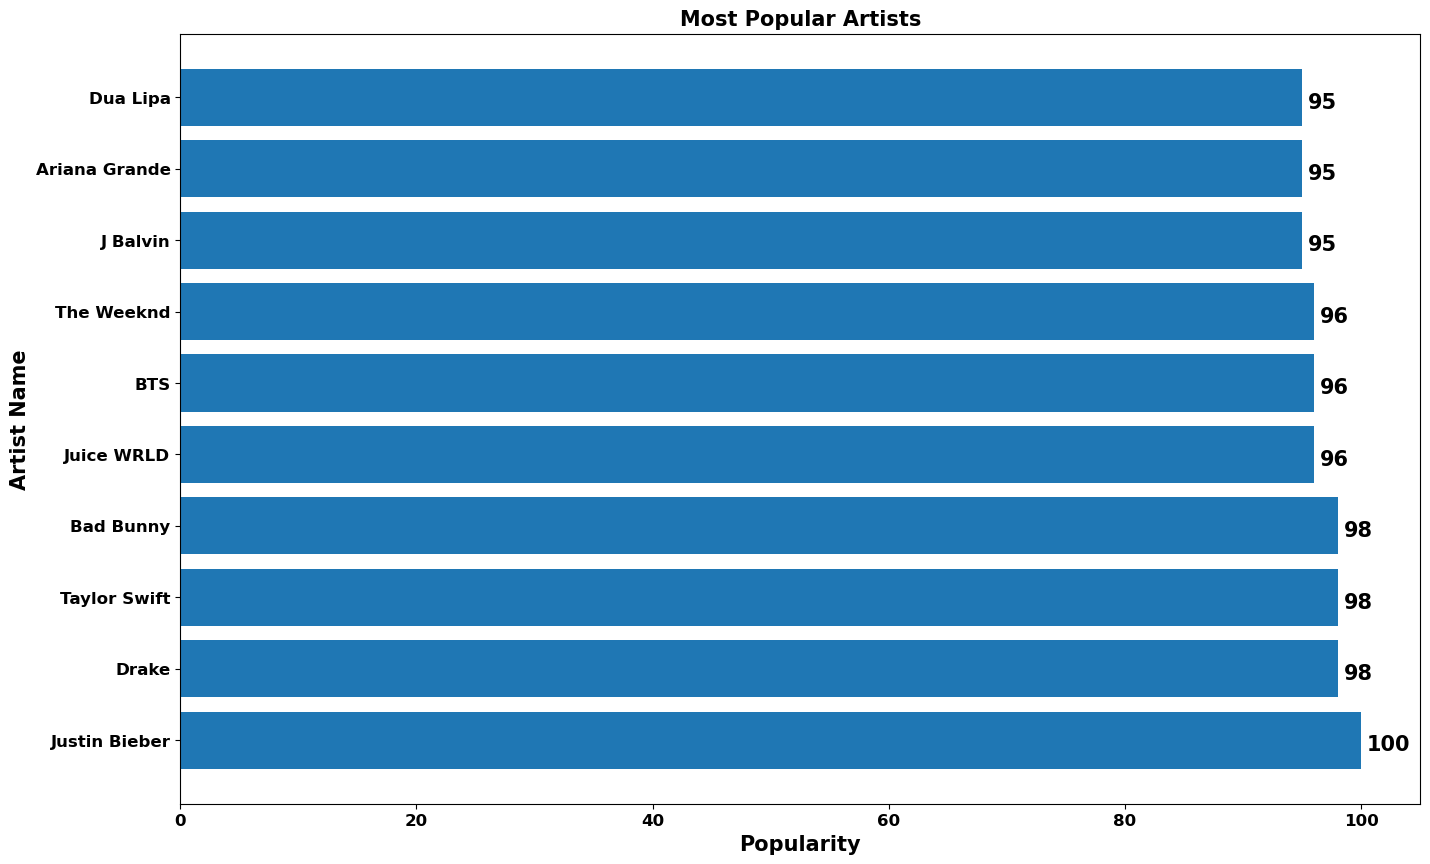

In [44]:
# Getting top 10 most popular artists
popular_artists = artists.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The most popular artist on Spotify (in terms of popularity rating) is Justin Bieber, with a popularity rating of 100, followed by Bad Bunny and Drake.

Most followed artists

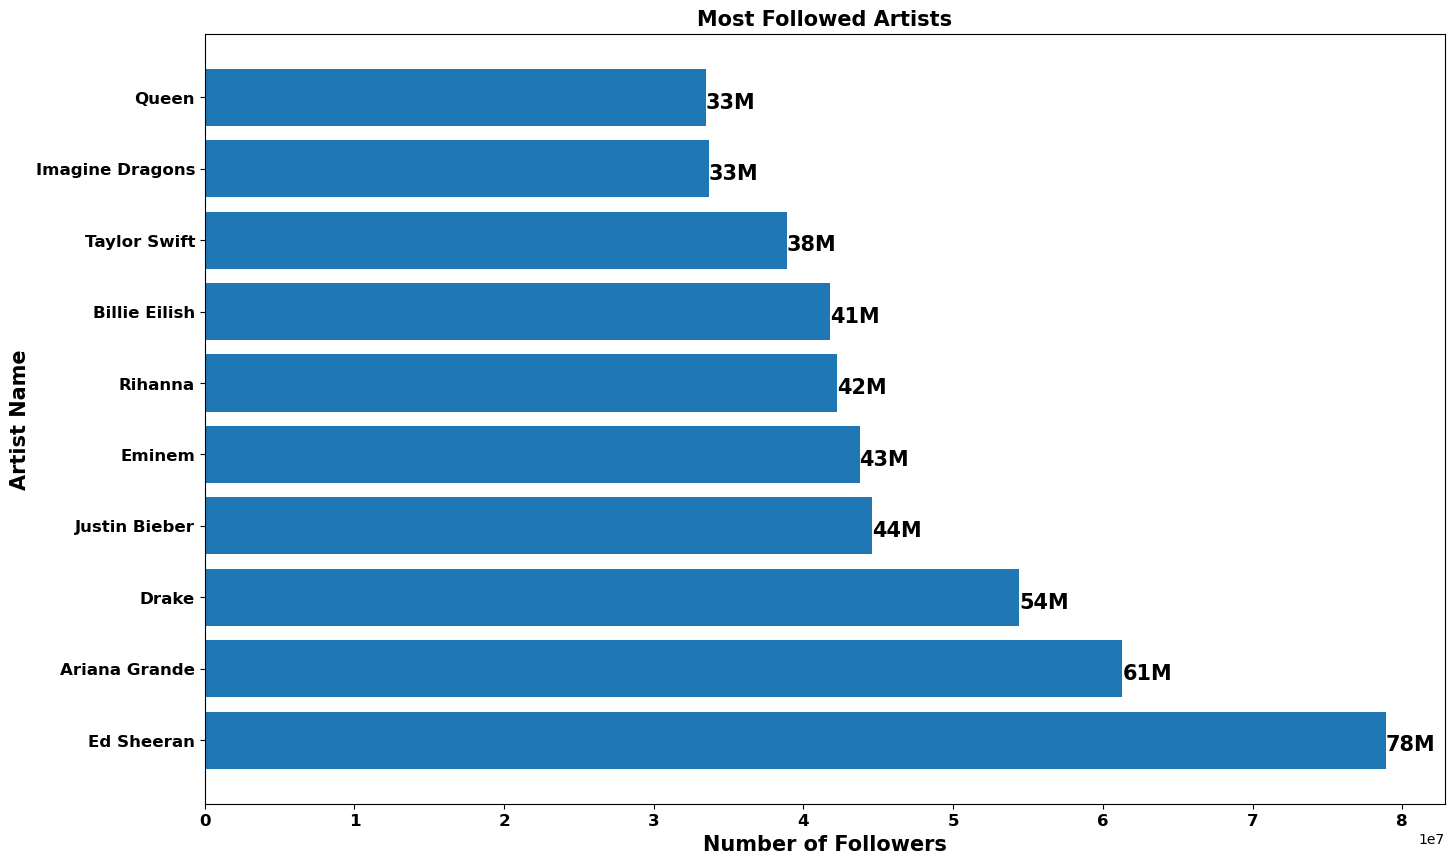

In [45]:
# Getting top 10 most followed artists
popular_artists = artists.groupby('name')['followers'].mean().sort_values(ascending=False).head(10)

# Plotting horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Followed Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Number of Followers', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v//1000000))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

Justin Bieber falls to 4th place in term of number of folllowers on Spotify, behind Drake, who has a lower popularity rating.

The most followed artist on Spotify is Ed Sheeran, with a massive 78.9 million followers.

Genre WordCloud

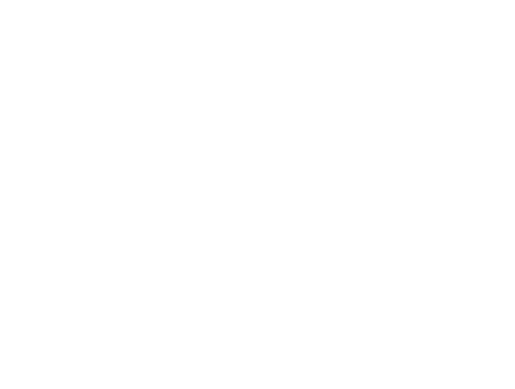

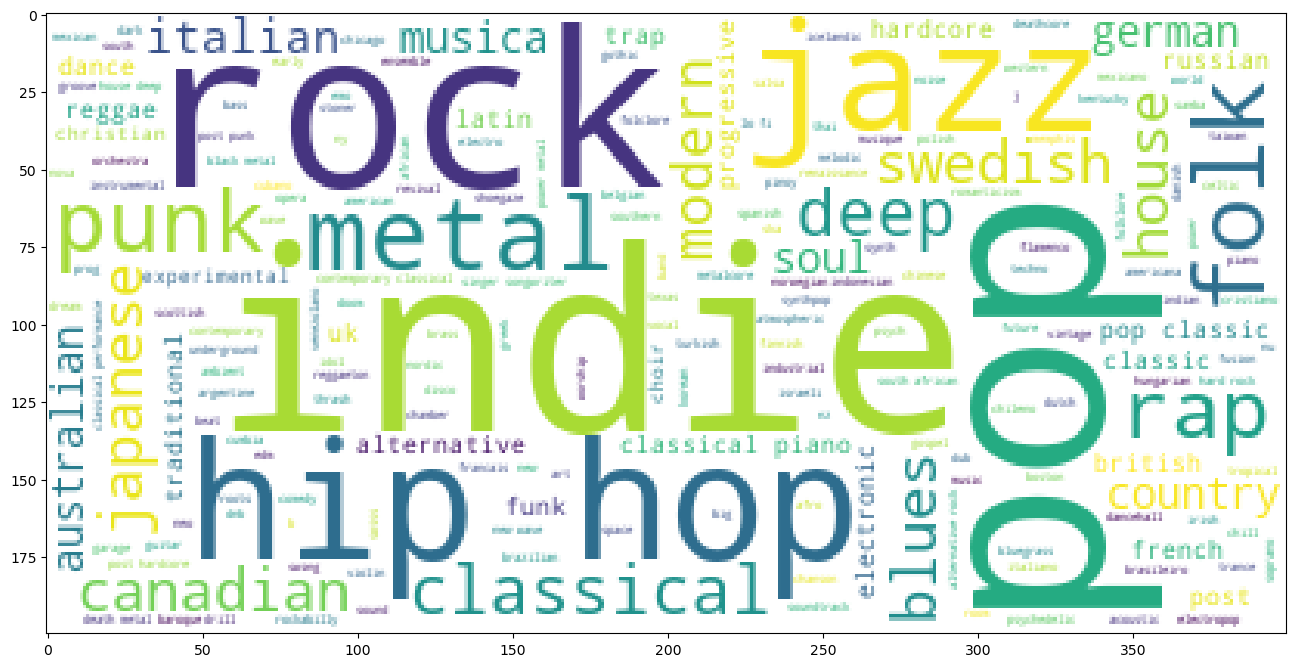

In [46]:
# Text from "genre" column in genres data
genre_text = ' '.join(genre for genre in genres.genres.astype(str))

# Generating wordcloud using text
wc = WordCloud(background_color="white")
wordcloud = wc.generate(genre_text)

# Displaying wordcloud
plt.axis('off')
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.show()

Most popular genres

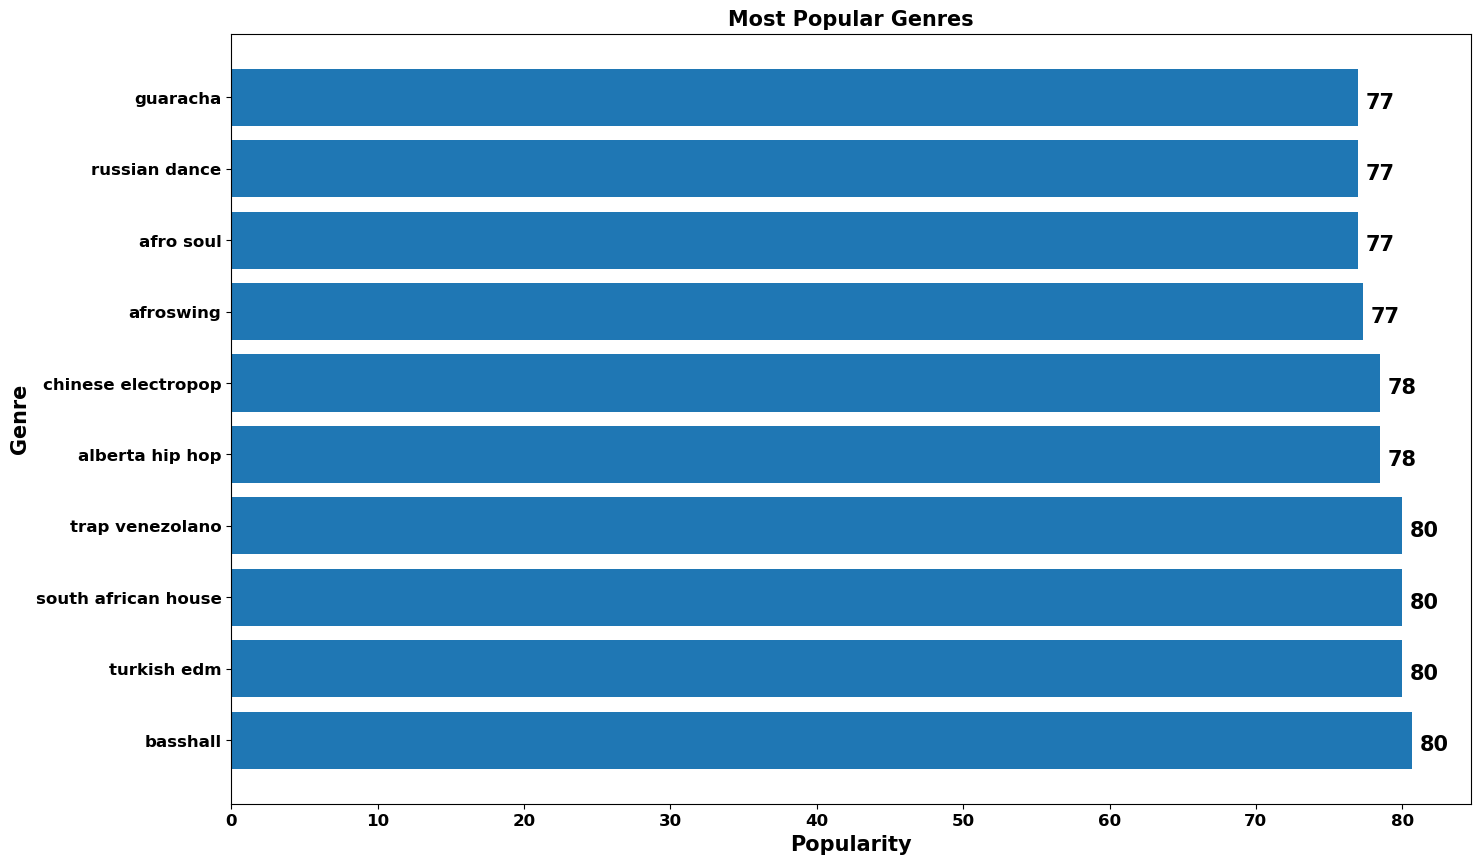

In [47]:
# Getting top 10 most popular genres
popular_genres = genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_genres.index, popular_genres)
plt.title('Most Popular Genres', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Genre', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_genres):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The above chart shows the most popular music genres, based on the popularity rating.

The most popular genre is basshall, followed by turkish edm and south african house.

#Modelling
content-based recommendation system

#1. Song recommender

In [48]:
# Sortting tracks data based on popularity and taking first 10,000 records
song_library = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

# Dropping "id_artists" field from DataFrame
song_library.drop(['id_artists'], axis=1, inplace=True)

# Resetting index for DataFrame
song_library.reset_index(inplace=True, drop=True)

# Displaying first 5 records
song_library.head()

,id,name,artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.3210,0.000000,0.420,0.464,90.030
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,pop postteen pop,2021,242.014,99,0.585,0.436,10,51.239,1,0.0601,0.7210,0.000013,0.105,0.132,143.874
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,australian hip hop,2021,132.780,98,0.778,0.695,4,53.135,0,0.0913,0.1750,0.000000,0.150,0.472,149.996
3,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,canadian contemporary rb canadian pop pop,2020,215.627,97,0.680,0.826,0,54.513,1,0.0309,0.0212,0.000012,0.543,0.644,118.051
4,6tDDoYIxWvMLTdKpjFkc1B,telepatía,Kali Uchis,colombian pop pop,2020,160.191,97,0.653,0.524,11,50.984,0,0.0502,0.1120,0.000000,0.203,0.553,83.970


In [49]:
# Creating CountVectorizer object to transform text into vector
song_vectorizer = CountVectorizer()

# Fitting the vectorizer on "genres" field of song_library DataFrame
song_vectorizer.fit(song_library['genres'])

CountVectorizer()

In [55]:
# Function to recommend more songs based on given song name
def song_recommender(song_name):
    try:
        # Numeric columns (audio features) in song_library DataFrame
        num_columns = ['release_year', 'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

        # Create vector from "genres" field (text data) for given song
        text_vector1 = song_vectorizer.transform(song_library[song_library['name']==str(song_name)]['genres']).toarray()

        # Create vector from numerical columns for given song
        num_vector1 = song_library[song_library['name']==str(song_name)][num_columns].to_numpy()

        # Initialise empty list to store similarity scores
        sim_scores=  []

        # For every song/track in song library, determine cosine similarity with given song
        for index, row in song_library.iterrows():
            name = row['name']

            # Create vector from "genres" field for other songs
            text_vector2 = song_vectorizer.transform(song_library[song_library['name']==name]['genres']).toarray()

            # Create vector from numerical columns for other songs
            num_vector2 = song_library[song_library['name']==name][num_columns].to_numpy()

            # Calculate cosine similarity using text vectors
            text_sim = cosine_similarity(text_vector1, text_vector2)[0][0]

            # Calculate cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vector1, num_vector2)[0][0]

            # Take average of both similarity scores and add to list of similarity scores
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)
        
        # Adding new column containing similarity scores to song_library DataFrame
        song_library['similarity'] = sim_scores

        # Sortting DataFrame based on "similarity" column
        song_library.sort_values(by=['similarity', 'popularity', 'genres'], ascending=[False, False, False], inplace=True)

        # Creating DataFrame "recommended_songs" containing 5 songs that are most similar to the given song and returning this DataFrame
        recommended_songs = song_library[['name', 'artists', 'genres']][2:7]
        return recommended_songs
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [51]:
# songs like Hail to the King by Avenged Sevenfold
song_recommender('Hail to the King')

,name,artists,genres
2939,All Summer Long,Kid Rock,alternative metal nu metal
8540,Shepherd of Fire,Avenged Sevenfold,alternative metal nu metal
7399,Afterlife,Avenged Sevenfold,alternative metal nu metal
9141,A Little Piece of Heaven,Avenged Sevenfold,alternative metal nu metal
1763,Down with the Sickness,Disturbed,alternative metal nu metal rap metal


In [52]:
song_recommender('Eye of the Tiger')

,name,artists,genres
9286,"Burning Heart - From ""Rocky IV"" Soundtrack",Survivor,album rock hard rock rock soft rock
8053,Burnin' for You,Blue Öyster Cult,album rock art rock classic rock hard rock met...
1841,(Don't Fear) The Reaper,Blue Öyster Cult,album rock art rock classic rock hard rock met...
495,Don't Stop Believin',Journey,album rock classic rock hard rock mellow gold ...
2495,Don't Stop Believin',Journey,album rock classic rock hard rock mellow gold ...


In [53]:
song_recommender("Blinding Lights")

,name,artists,genres
852,Heartless,Kanye West,chicago rap rap
3279,Reminder,The Weeknd,canadian contemporary rb canadian pop pop
6393,False Alarm,The Weeknd,canadian contemporary rb canadian pop pop
3745,In The Night,The Weeknd,canadian contemporary rb canadian pop pop
386,Call Out My Name,The Weeknd,canadian contemporary rb canadian pop pop


In [56]:
song_recommender("False Alarm")

,name,artists,genres
3745,In The Night,The Weeknd,canadian contemporary rb canadian pop pop
616,Heartless,The Weeknd,canadian contemporary rb canadian pop pop
852,Heartless,Kanye West,chicago rap rap
6,Blinding Lights,The Weeknd,canadian contemporary rb canadian pop pop
386,Call Out My Name,The Weeknd,canadian contemporary rb canadian pop pop
